In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [30]:
df = pd.read_csv('/Users/carboni/Documents/UNIGE/pynotebook/personal/Images/foursquare_images_mod.csv')

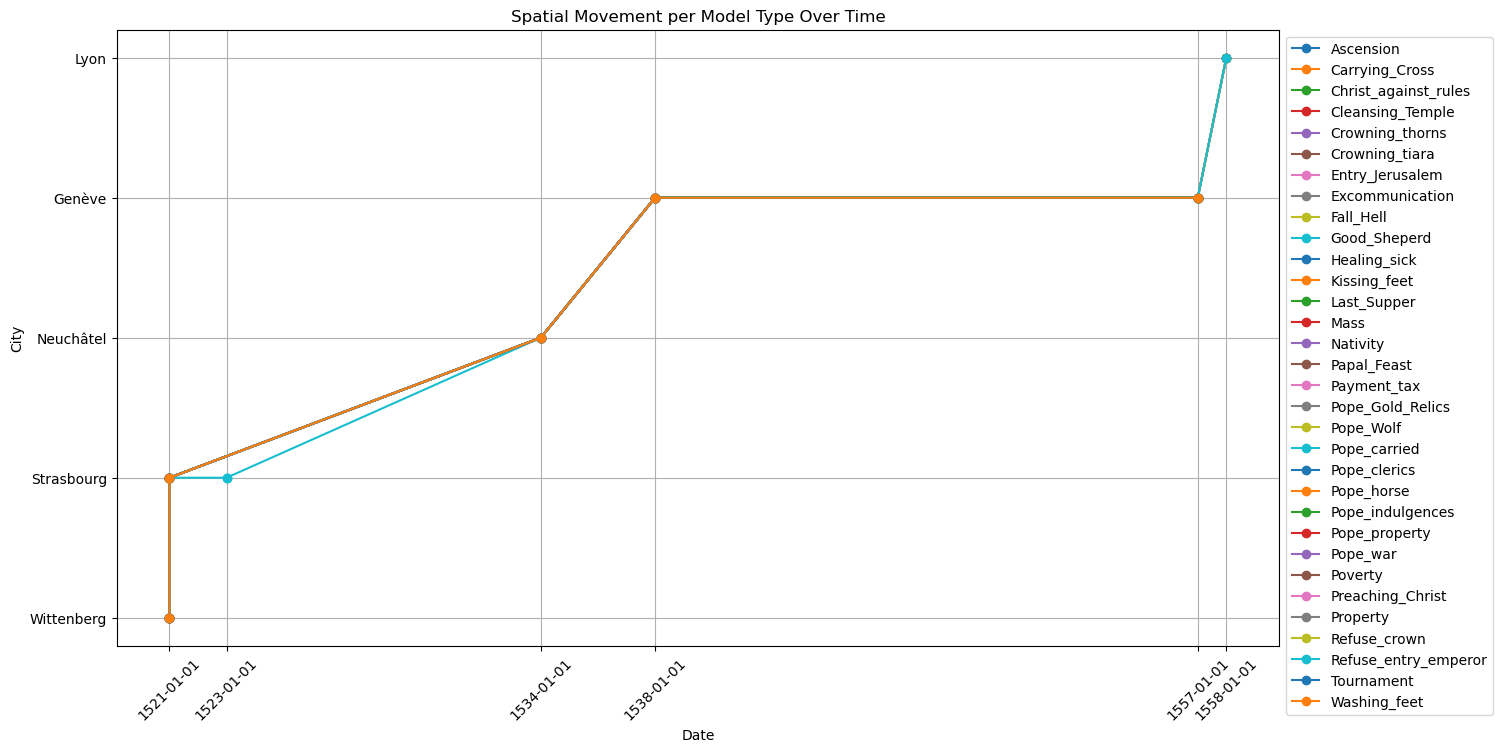

In [22]:
# Convert date strings to Python datetime objects
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S'))

# Convert dates to ordinal format for plotting
df['date_ordinal'] = df['date'].apply(lambda x: x.toordinal())

# Sort by 'cc:ModelType' and then by 'date'
df.sort_values(by=['cc:ModelType', 'date_ordinal'], inplace=True)

# Map cities to numbers for plotting
unique_cities = df['vc:City'].unique()
city_to_num = {city: i for i, city in enumerate(unique_cities)}

# Unique dates for x-axis ticks
unique_dates = df['date'].unique()
date_ticks = [d.toordinal() for d in unique_dates]
date_labels = [d.strftime('%Y-%m-%d') for d in unique_dates]

# Plotting
plt.figure(figsize=(15, 8))

for model_type in df['cc:ModelType'].unique():
    model_df = df[df['cc:ModelType'] == model_type]
    plt.plot(model_df['date_ordinal'], model_df['vc:City'].map(city_to_num), marker='o', label=model_type)

plt.xticks(date_ticks, date_labels, rotation=45)
plt.xlabel('Date')
plt.ylabel('City')
plt.yticks(range(len(unique_cities)), unique_cities)  # Set y-ticks to city names
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside of plot
plt.title('Spatial Movement per Model Type Over Time')
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('model_type_movement.png', bbox_inches='tight')

plt.show()